# 시계열 데이터를 이용한 주가 예측

## 1. 정상 프로세스와 비정상 프로세스
1. Stationary Process : 시간에 관계없이 평균과 분산이 일정한 시계열 데이터  

2. Non-Stationary Process : 시간에 관계없이 평균과 분산이 일정하기 않은 시계열 데이터

    - X축을 Lag(현재 데이터와의 시점 차이)로 Y축을 ACF(Autocorrelation Function)으로 시각화 하였을 때 특정 패턴이 없으면 Stationary Process로 볼 수 있다.  

    - Autocorrelation은 시계열의 관점으로 볼 때 time shifted된 자기 자신과의 correlation을 의미한다.


## 2. Autoregressive(AR) Models
자기 자신을 종속 변수(dependent variable) $y_t$로 하고, 이전 시점의 시계열(Lag) $[y_{t-1},\; y_{t-2},\; \ldots,\; y_{t-p}]$를 독립 변수(independent variable)로 갖는 모델을 의미한다.
$$y_t = \theta_0 + \theta_1y_{t-1} + \cdots + \theta_py_{t-p} + \varepsilon_t$$

## 3. Moving Average(MA) Models
자기 자신을 종복 변수(dependent variable) $y_t$로 하고, 해당 시점과 그 과거의 white noise distribution error인 $[\varepsilon_t,\; \varepsilon_{t-1},\; \ldots,\; \varepsilon_{t-q}]$를 독립변수(independent variable)로 갖는 모델
$$y_t = \theta_0 + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q}$$

## 4. Autoregressive and Moving Average(ARMA)
자기 자신을 종복 변수 $y_t$로 하고, 이전 시점의 시계열(Lag) $[y_{t-1},\; y_{t-2},\; \ldots,\; y_{t-p}]$과 $[\varepsilon_t,\; \varepsilon_{t-1},\; \ldots,\; \varepsilon_{t-q}]$를 독립변수로 갖는 모델로 AR과 MA를 합친 모델이다.
$$y_t = \vartheta_0 + \vartheta_1y_{t-1} + \cdots + \vartheta_p y_{t-p} + \varepsilon_t + \theta_1\varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-1}$$

## 5. Autoregressive Integrated Moving Average(ARIMA)
기존 AR, MA, ARMA 모델의 경우 데이터가 Stationary이어야 함으로 Non-Stationary인 경우는 차분(differencing)을 통해 데이터를 Stationary하게 만들어줘야 한다.
ARIMA는 ARMA 모형에 차분을 d회 수행해준 모델이다.

- 차분(differencing) : 현 시점 데이터에서 d시점 이전 데이터를 뺀 것.

## 6. ACF(자기 상관 함수)와 PACF(부분 자기 상관 함수)

- ACF(AutoCorrelation Function)  

ACF(AutoCorrelation Function, 자기상관함수)는 k시간 단위로 구분된 시계열의 관측치 간 상관계수 함수를 의미하며, k가 커질수록 ACF는 0에 가까워진다.  

이때, ACF를 구하는 식은 일반 Correlation을 구하는 식과 동일하다.  

아래 식은 $y_t$와 $y_{t-k}$사이의 자기상관을 구하는 식이다.

$$\text{ACF}(k) = \frac{\sum_{t=1}^{N-k}(y_t - \bar{y})(y_{t+k} - \bar{y})}{\sum_{t=1}^N(y_t - \bar{y})^2}$$

- PACF(Partial ACF)

부분 상관(Partial Correlation)이란 두 확률 변수 X와  Y에 의해 다른 모든 변수들에 나타난 상관 관계를 설명하고 난 이후에도 여전히 남아있는 상관 관계라고 정의할 수 있다.

부분자기상관함수(PACF)는 자기상관함수와 마찬가지로 시계열 관측지 간 상관 관계 함수이고, 시차 k에서의 k단계만큼 떨어져 있는 모든 데이터 점들간의 순수한 상관 관계를 말한다.

다시말해 $y_t$와 $y_{t-k}$의 PACF는 $y_t$와 $y_{t-k}$간의 순수한 상관관계로서, 두 시점 사이에 포함된 모든 $y_{t-1},\; y_{t-2},\; \ldots,\; y_{t-k+1}$의 영향력은 제거됨을 의미한다.

$$\text{PACF}(k) = \text{Corr}(e_t,\; e_{t-k})$$


# 직접 주가예측 해보기

In [15]:
# 시계열 데이터 준비
# 넥슨, 네이버의 주식 데이터를 준비함

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size']=8

nexon_path = 'C:/Users/Myeong/dding/data/주식/Nexon.csv'
naver_path = 'C:/Users/Myeong/dding/data/주식/Naver.csv'

nexon = pd.read_csv(nexon_path, index_col='Date', parse_dates=True)
naver = pd.read_csv(naver_path, index_col='Date', parse_dates=True)

# 예측에는 종가를 이용하여 예측하기로 함
nexon_ts = nexon['Close']
naver_ts = naver['Close']

In [16]:
# 결측치 처리
# 시계열 인덱스를 기준으로해서 결측치 보간
nexon_ts = nexon_ts.interpolate(method='time')
naver_ts = naver_ts.interpolate(method='time')

print(nexon_ts[nexon_ts.isna()])
print(naver_ts[naver_ts.isna()])

# log 변환
nexon_ts_log = np.log(nexon_ts)
naver_ts_log = np.log(naver_ts)

Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)


## 넥슨 주식데이터 분석

In [17]:
def plot_rolling_statistics(timeseries, window=12):

    rolmean = timeseries.rolling(window=window).mean() # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std() # 이동표준편차 시계열

    # 원본 시계열, 이동평균, 이동표준편차 시각화
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지의 adfuller 메서드 호출
    df_test = adfuller(timeseries, autolag='AIC')

    # adfuller 메서드가 리턴한 결과를 정리하여 출력
    # adfuller 결과 p-value가 유의수준 값보다 작으면 정상적인 시계열 데이터라고 볼 수 있다.
    # 보통 0.05미만, 요즘은 0.005 미만으로 해야 한다는 말도 있다고 함.
    print('Results of Dickey-Fuller Test:')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)'%key]=value
    print(df_output)



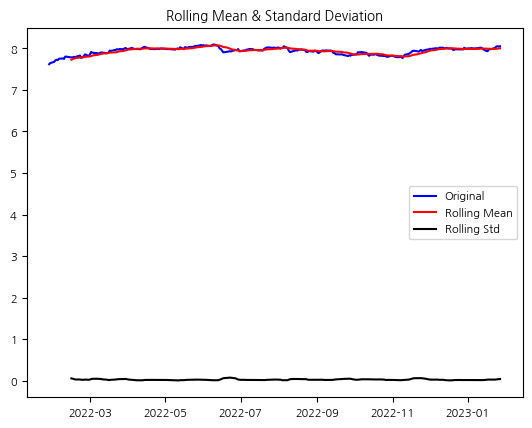

Results of Dickey-Fuller Test:
Test Statistic                  -3.533049
p-value                          0.007178
#Lags Used                       0.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


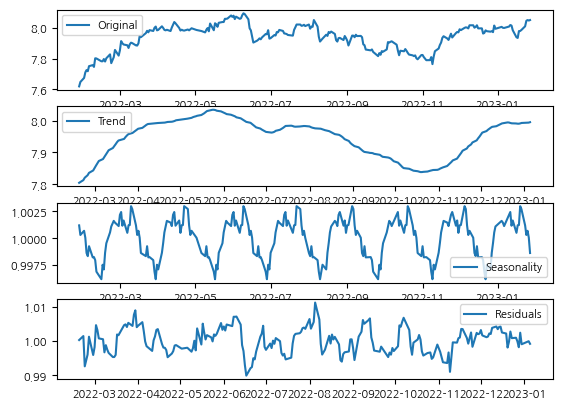

In [18]:
ts_log = nexon_ts_log

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

In [19]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)
# p-value가 0.005 미만으로 내려갔으니 stationary하다고 볼 수 있겠다.

Results of Dickey-Fuller Test:
Test Statistic                  -4.553747
p-value                          0.000157
#Lags Used                       8.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


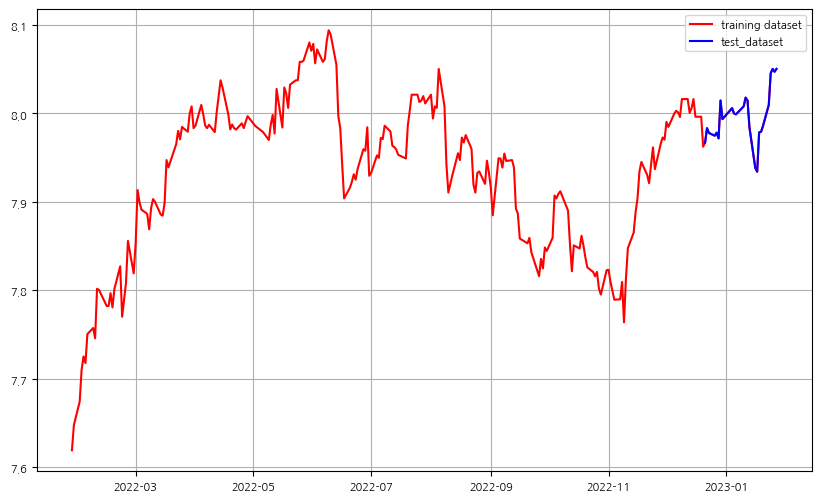

In [20]:
# train, test dataset
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test_dataset')
plt.legend(loc='best')
plt.show()

c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


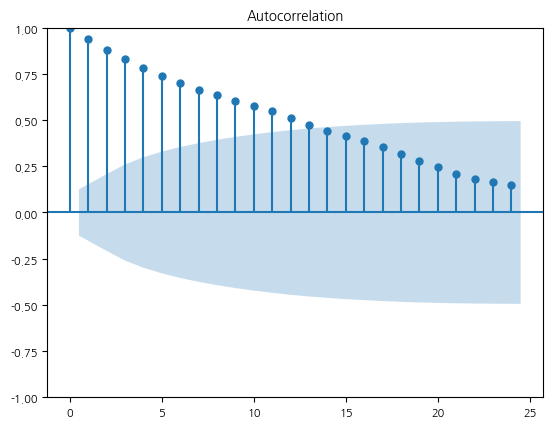

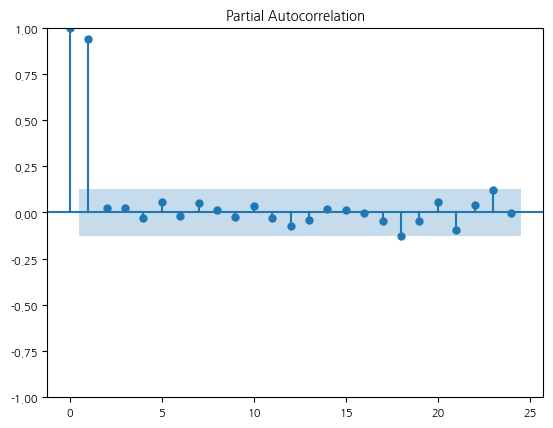

In [23]:
# ARIMA 모수 찾아보기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)
plot_pacf(ts_log)
plt.show()

PACF 그래프를 보면 2부터 급격하게 0으로 수렴하는 것을 볼 수 있다.  

ARIMA 모수로 p=1, q=0으로 잡고 진행 해보겠다.  

많은 시계열 데이터가 AR이나 MA중 하나의 경향을 가지며 보통 $p \times q = 0$이 되는 값을 사용한다.

Results of Dickey-Fuller Test:
Test Statistic                -1.607366e+01
p-value                        5.472525e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64


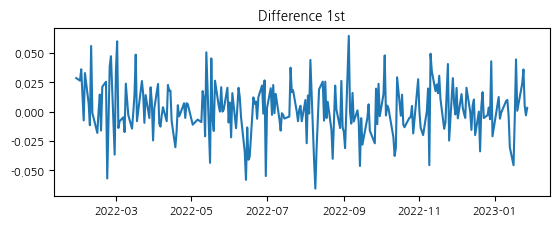

Results of Dickey-Fuller Test:
Test Statistic                -6.919762e+00
p-value                        1.154534e-09
#Lags Used                     1.400000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


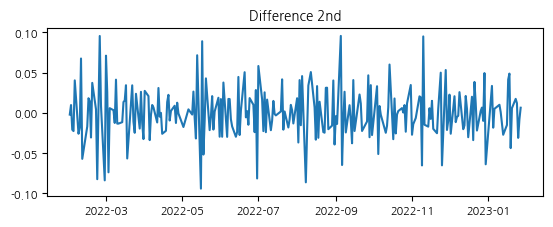

In [28]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
augmented_dickey_fuller_test(diff_1)

plt.subplot(211)
plt.plot(diff_1)
plt.title('Difference 1st')
plt.show()

# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
augmented_dickey_fuller_test(diff_2)

plt.subplot(212)
plt.plot(diff_2)
plt.title('Difference 2nd')
plt.show()

In [29]:
# ARIMA 모델 사용
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,0)) # p, d, q
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  220
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 521.394
Date:                Fri, 27 Jan 2023   AIC                          -1038.787
Time:                        15:37:10   BIC                          -1032.009
Sample:                             0   HQIC                         -1036.050
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0379      0.055     -0.689      0.491      -0.146       0.070
sigma2         0.0005   4.32e-05     11.584      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.01   Jarque-

c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


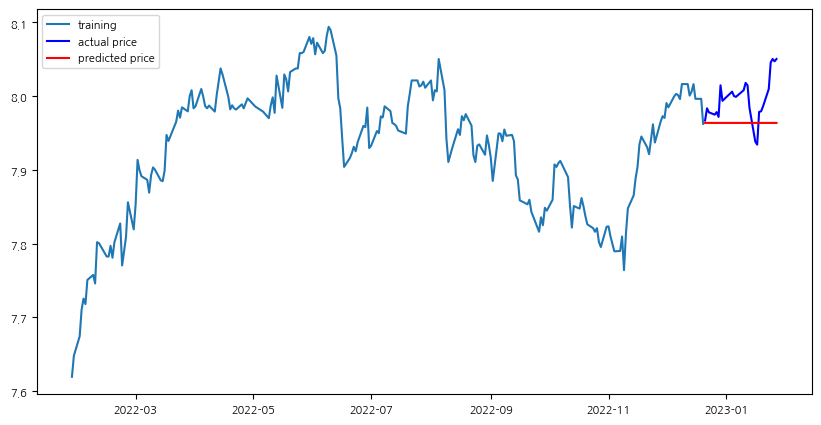

In [30]:
# forecast 
fc = fitted_m.forecast(len(test_data), alpha=0.05)
fc = np.array(fc)

fc_series = pd.Series(fc, index=test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  17696.957312338815
MAE:  109.61017169579613
RMSE:  133.02991134454993
MAPE: 3.62%
